<font size="5">Boston Housing Prices Regression Challenge: Multiple Linear Regression Solution</font>

<u>Background<u />
    
The Boston Housing Competition is a machine learning challenge based on the data sampled in the economics research paper 'Hedonic Prices and the Demand for Clean Air' (Harrison & Rubinfeld, 1978).

Entrants predict the median home value per neighborhood of owner-occupied houses in the historic Boston Metropolitan Area, using information about the neighborhoods captured within 15 attributes (including the target).

Here, a Multiple Linear Regression model is optimized using the Ordinary Least Squares cost function (no penalty/regularization) to estimate parameter coefficients;\
predictions are generated and submitted for scoring (RMSE) on a hidden/inaccessible Kaggle-hosted test set.

Finally, performance is discussed, and options for further analysis are outlined. 

<br />

<u>Solution Development Process<u />
  1. Dataset is described and visualized in order to evaluate possible relationships prior to training
  2. Target and features are identified, transformed and preprocessed from available variables
  2. Linear regression model is trained and predictions are output
  4. Predictive accuracy is evaluated using the highly interpretable Root Mean Squared Error metric

\
Dataset: https://www.kaggle.com/competitions/boston-housing/data

In [1]:
#Perform necessary imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Read and preview train data
bost_train = pd.read_csv(r'C:\Users\Domanic\Desktop\bost_train.csv')
bost_train.head(3)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [2]:
#High-level dataet evaluation
  #15 numeric attributes (incl. target 'medv'); feature descriptions provided on competition page
  #333 record sample, no missing values
bost_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.2 KB


In [3]:
#Detailed dataset evaluation (incorporates information from original paper)
  #The magnitude/range of features varies (e.g., proportions, ratios, mean distances, prices)
  #'chas' is a binary variable representing a 2-level category (property bounded by Charles River)
  #'black' is a transformed, inverse measure of black population proportion
bost_train.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


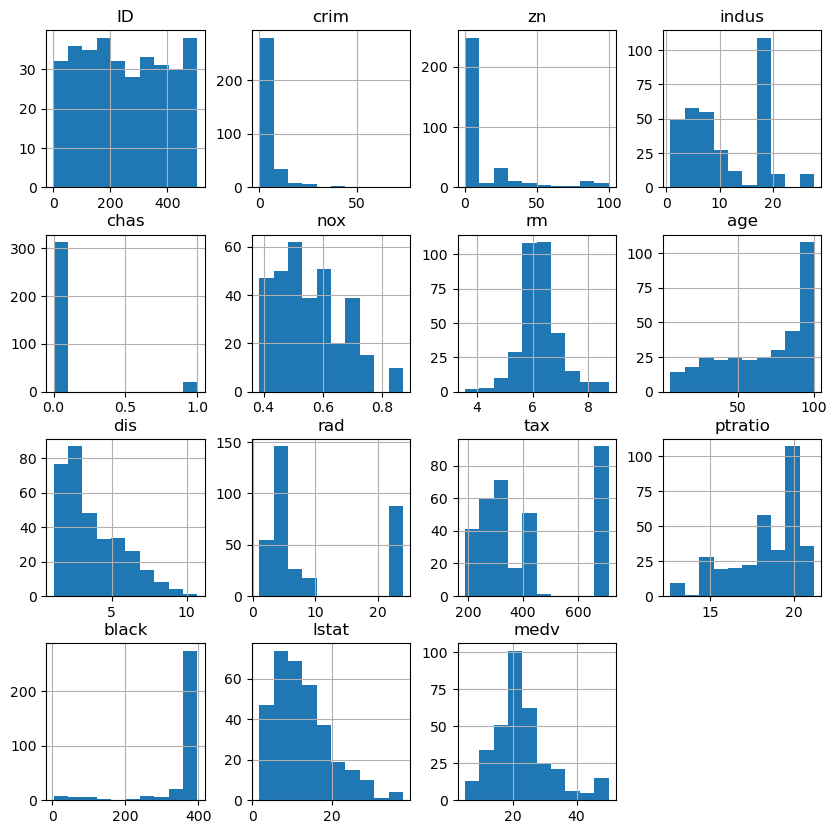

In [4]:
bost_train.hist(figsize=(10, 10))
plt.show()

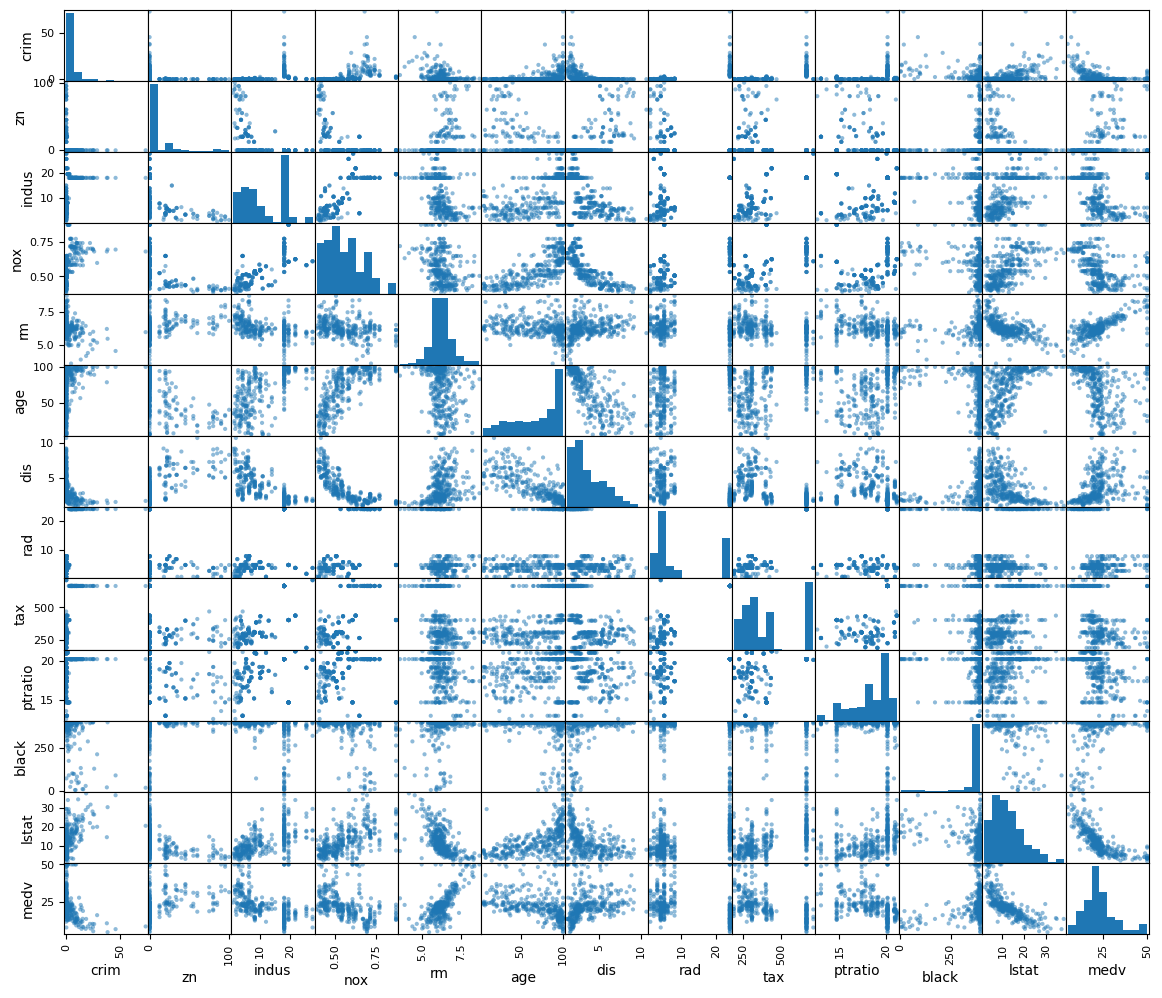

In [5]:
#Scatter Matrix
  #Plot of predictors against target suggests some features may have an exponential/curvilinear relationship with 'medv'
  #Plot of predictors against other predictors suggests possible presence of interactions

numeric = bost_train.drop(bost_train[['ID','chas']], axis=1)

pd.plotting.scatter_matrix(numeric, grid=True, figsize=(14,12))
plt.show()

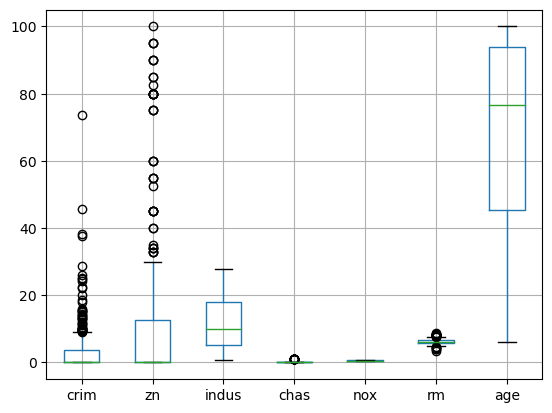

In [6]:
#Train Set Boxplots (prior to preprocessing)

#First 7 columns (excluding 'ID')
bp_df1 = bost_train[['crim','zn','indus','chas','nox','rm','age']]
bp_df1.boxplot()
plt.show()

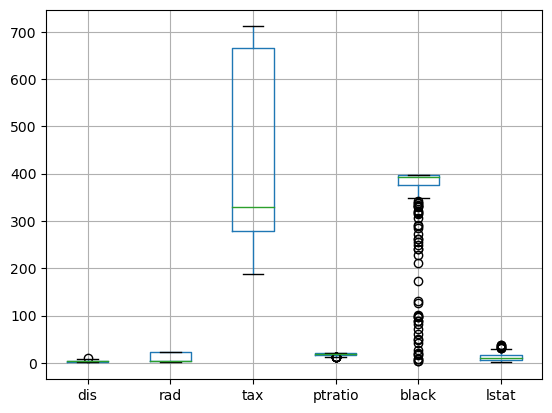

In [7]:
#Final 6 columns
bp_df2 = bost_train[['dis','rad','tax','ptratio','black','lstat']]
bp_df2.boxplot()
plt.show()

<Axes: >

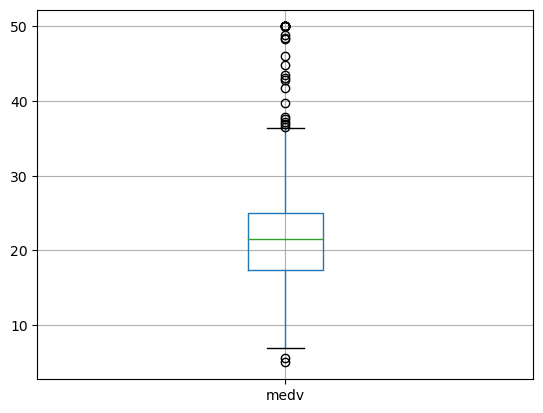

In [8]:
#Create y_train
y_train = bost_train['medv']

#Visualize y_train with boxplot
y_train_df = pd.DataFrame(y_train)
y_train_df.boxplot()

In [9]:
#Preprocess X_train: Transform + Encode

#Create de-transformed 'black proportion per town' percentage measure
bost_train['black_per'] = np.abs( (bost_train['black']/1000) **(1/2) - 0.63)
#bost_train['black_per'].mean() #checks mean value against excel calculation of 0.039622

#Create one-hot dummy variable df for 'Charles River' attribute
cat_encoder = OneHotEncoder(sparse_output=False)
riv_encoded_train = cat_encoder.fit_transform(bost_train[['chas']])
riv_enc_train_df = pd.DataFrame(riv_encoded_train)
#Replace dummy column names for interpretability
col1 = cat_encoder.get_feature_names_out()[0]
col2 = cat_encoder.get_feature_names_out()[1]
riv_enc_train_df.rename(columns={0: col1, 1: col2}, inplace=True)

#Drop pre-transformed+unused attributes
X_train = bost_train.drop(bost_train[['ID','chas','black','medv']], axis=1)

#Preview
X_train.head(3)

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,lstat,black_per
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,0.000000
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,0.000000
2,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,0.001804


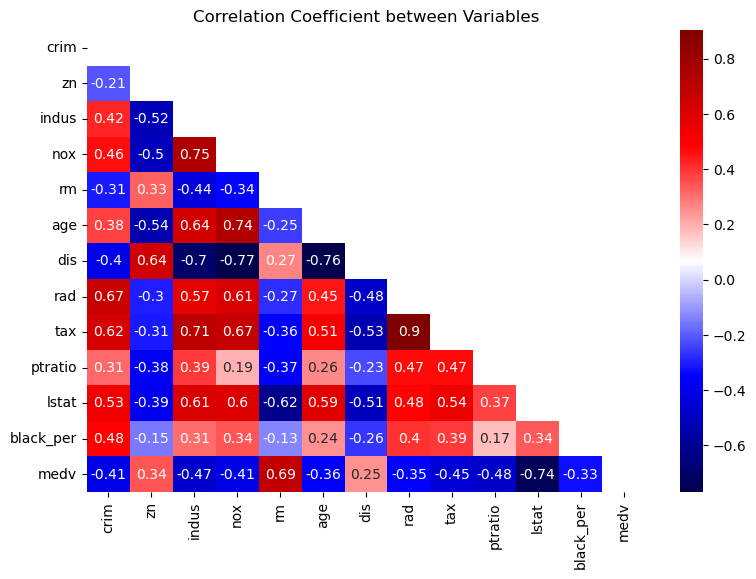

In [10]:
#Evaluate correlations between attributes (minus dummies)
  #Between features & target:
    #'rm' and 'lstat' have a fairly strong positive and negative correlation, respectively, with 'medv'
    #the remaining features have a weak-to-moderate correlation (predominantly inverse/negative)
  #Between features:
    #Degree of correlation between some features suggests assessment of multicollinearity may be informative
    
#Create correlation matrix
X_train_corr_df = pd.concat([X_train, y_train], axis=1)
X_train_corr_matrix = X_train_corr_df.corr() 
    
#Utilize mask to simplify heatmap
  #Hides correlations of variables with self
  #Hides correlations mirrored in diagonal axis

plt.figure(figsize=(9,6))

# Generate a mask
mask = np.triu(np.ones_like(X_train_corr_matrix, dtype=bool))

#Plot masked heatmap
sns.heatmap(X_train_corr_matrix, annot=True, cmap='seismic', mask=mask) #removed colorbar label range parameter: , vmin=-1, vmax=1
plt.title('Correlation Coefficient between Variables')
plt.show()

In [11]:
#Correlations against target only
X_train_corr_matrix['medv'].sort_values(ascending=False)

medv         1.000000
rm           0.689598
zn           0.344842
dis          0.249422
black_per   -0.330407
rad         -0.352251
age         -0.358888
crim        -0.407454
nox         -0.413054
tax         -0.448078
indus       -0.473932
ptratio     -0.481376
lstat       -0.738600
Name: medv, dtype: float64

In [12]:
#Evaluation of multicollinearity: VIF

#Specify features/predictors
high_corr_feats = X_train.columns.values

#Function to return df of VIF for specified features
def compute_vif(high_corr_feats):
    
    vif_input_df = X_train[high_corr_feats]
    #The calculation of variance inflation requires a constant
    vif_input_df['intercept'] = 1
    
    #Create dataframe to store vif values
    vif_out_df = pd.DataFrame()
    vif_out_df["Variable"] = vif_input_df.columns
    vif_out_df["VIF"] = [variance_inflation_factor(vif_input_df.values, i) for i in range(vif_input_df.shape[1])]
    vif_out_df = vif_out_df[vif_out_df['Variable']!='intercept']
    return vif_out_df

In [13]:
#Display VIF dataframe

compute_vif(high_corr_feats).sort_values('VIF', ascending=False)

,Variable,VIF
8,tax,8.394189
7,rad,7.207804
3,nox,4.416350
6,dis,3.892756
2,indus,3.811186
5,age,3.206895
10,lstat,2.890079
0,crim,2.240870
1,zn,2.089999
4,rm,1.901922


In [14]:
#Scale X_train

#Save column names
col_names = pd.Series(X_train.columns)

#Instantiate scaler; fit+transform X_train
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))

#Re-apply column names
X_train.rename(columns=col_names, inplace=True)

#Add dummy columns
X_train = pd.concat([X_train, riv_enc_train_df], axis=1)

#Preview scaled X_train
X_train.head(3)

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,lstat,black_per,chas_0,chas_1
0,-0.456875,0.322906,-1.285631,-0.166787,0.440154,-0.107736,0.192133,-0.98907,-0.664062,-1.465171,-1.067772,-0.379167,1.0,0.0
1,-0.454016,-0.472123,-0.604425,-0.767928,0.221060,0.379963,0.635528,-0.87451,-0.980620,-0.301616,-0.478299,-0.379167,1.0,0.0
2,-0.453327,-0.472123,-1.304235,-0.863762,1.041952,-0.798347,1.189127,-0.75995,-1.097863,0.117264,-1.356840,-0.361902,1.0,0.0


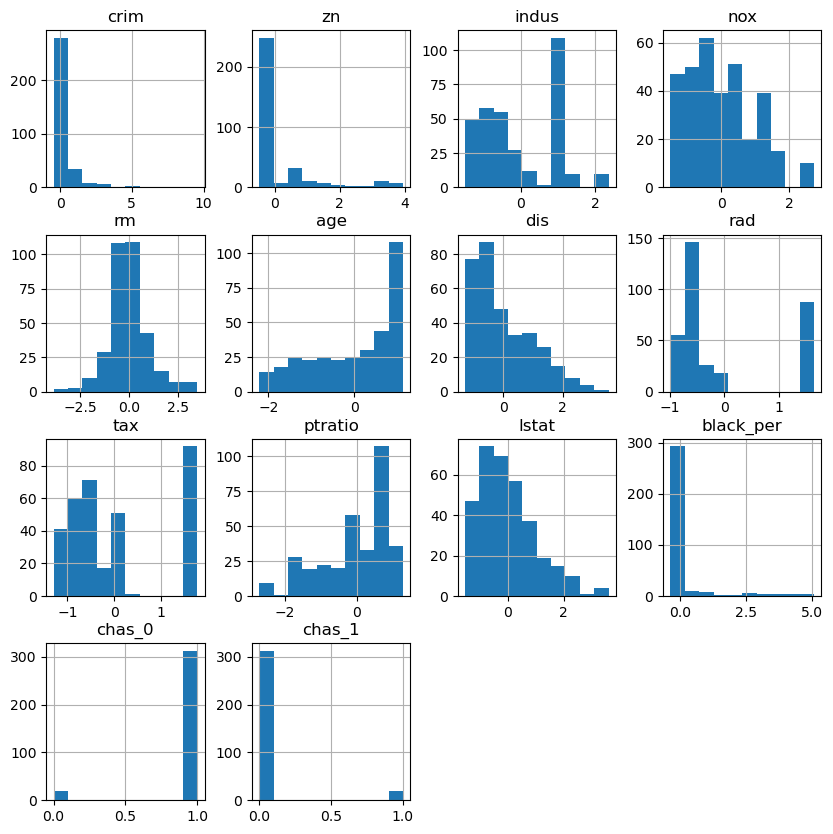

In [15]:
#Scaled X_train histogram
X_train.hist(figsize=(10, 10))
plt.show()

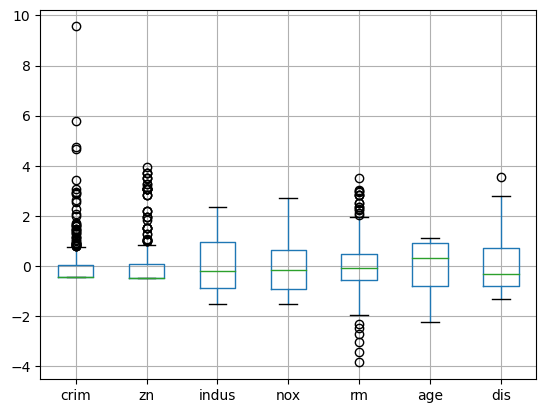

In [16]:
#Scaled X_train Boxplots
#First 7 columns (excluding 'ID')
bp_df3 = X_train[['crim','zn','indus','nox','rm','age','dis']]
bp_df3.boxplot()
plt.show()

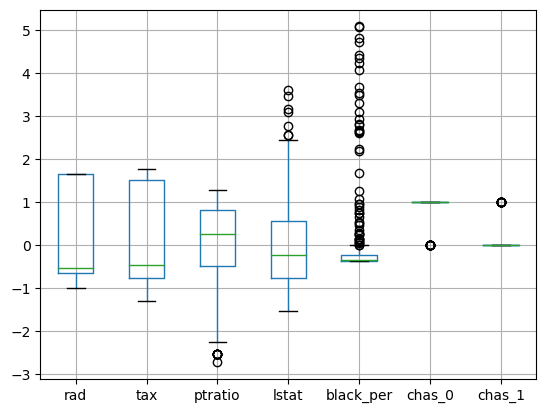

In [17]:
#Final 7 columns
bp_df4 = X_train[['rad','tax','ptratio','lstat','black_per','chas_0','chas_1']]
bp_df4.boxplot()
plt.show()

In [18]:
#Read and preview test data
bost_test = pd.read_csv(r'C:\Users\Domanic\Desktop\bost_test.csv')
bost_test.head(3)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15


In [19]:
bost_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       173 non-null    int64  
 1   crim     173 non-null    float64
 2   zn       173 non-null    float64
 3   indus    173 non-null    float64
 4   chas     173 non-null    int64  
 5   nox      173 non-null    float64
 6   rm       173 non-null    float64
 7   age      173 non-null    float64
 8   dis      173 non-null    float64
 9   rad      173 non-null    int64  
 10  tax      173 non-null    int64  
 11  ptratio  173 non-null    float64
 12  black    173 non-null    float64
 13  lstat    173 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 19.1 KB


In [20]:
bost_test.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,258.404624,4.100862,12.661850,10.835145,0.086705,0.549981,6.321237,69.245665,3.958865,9.387283,406.231214,18.469942,351.299711,12.917977
std,143.289788,10.607761,24.536277,6.596488,0.282219,0.117826,0.700621,28.248244,2.324131,8.662621,164.480626,2.196196,99.781464,7.293408
min,3.000000,0.013810,0.000000,0.460000,0.000000,0.392000,4.138000,2.900000,1.178100,1.000000,187.000000,12.600000,0.320000,1.920000
25%,136.000000,0.082210,0.000000,5.320000,0.000000,0.447000,5.895000,42.800000,2.010700,4.000000,279.000000,17.000000,371.720000,6.870000
50%,268.000000,0.251990,0.000000,8.560000,0.000000,0.538000,6.223000,79.200000,3.421100,5.000000,330.000000,19.100000,390.070000,12.120000
75%,381.000000,3.673670,20.000000,18.100000,0.000000,0.624000,6.674000,94.600000,5.400700,24.000000,666.000000,20.200000,396.060000,17.210000
max,505.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000


In [21]:
#Preprocess X_test: Transform + Encode

#Create de-transformed 'black proportion per town' percentage measure
bost_test['black_per'] = np.abs( (bost_test['black']/1000) **(1/2) - 0.63)

#Create one-hot dummy variable df for 'Charles River' attribute
riv_encoded_test = cat_encoder.transform(bost_test[['chas']])
riv_enc_test_df = pd.DataFrame(riv_encoded_test)
#Replace dummy column names for interpretability
riv_enc_test_df.rename(columns={0: col1, 1: col2}, inplace=True)

#Drop pre-transformed+unused attributes
X_test = bost_test.drop(bost_test[['ID','chas','black']], axis=1)

#Preview
X_test.head(3)

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,lstat,black_per
0,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,0.003238
1,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,0.002210
2,0.14455,12.5,7.87,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,0.000000


In [22]:
#Scale X_test

#Transform using previously fit scaler
X_test = pd.DataFrame(scaler.transform(X_test))

#Re-apply column names
X_test.rename(columns=col_names, inplace=True)

#Add dummy columns
X_test = pd.concat([X_test, riv_enc_test_df], axis=1)

#Preview scaled X_test
X_test.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,lstat,black_per,chas_0,chas_1
0,-0.454018,-0.472123,-0.604425,-0.767928,1.307995,-0.253690,0.635528,-0.87451,-0.980620,-0.301616,-1.202387,-0.348176,1.0,0.0
1,-0.453670,-0.472123,-1.304235,-0.863762,0.233864,-0.339127,1.189127,-0.75995,-1.097863,0.117264,-1.035181,-0.358016,1.0,0.0
2,-0.438046,0.079980,-0.489936,-0.288758,-0.133190,0.992257,1.132660,-0.53083,-0.576130,-1.511713,0.940118,-0.379167,1.0,0.0
3,-0.428961,0.079980,-0.489936,-0.288758,-0.902866,1.131092,1.199187,-0.53083,-0.576130,-1.511713,2.467645,-0.300655,1.0,0.0
4,-0.434574,0.079980,-0.489936,-0.288758,-0.372202,0.629153,1.457004,-0.53083,-0.576130,-1.511713,0.649633,-0.301271,1.0,0.0


In [23]:
#Perform multiple linear regression and predict
linreg = LinearRegression(n_jobs=-1)

linreg.fit(X_train, y_train)

#Display calculated feature coefficients
coef_df = pd.DataFrame(linreg.coef_,linreg.feature_names_in_)
coef_df.rename(columns={0:'Coefficient'}, inplace=True)
coef_df

,Coefficient
crim,-0.332782
zn,1.069097
indus,0.359724
nox,-1.805132
rm,2.682067
age,-0.152725
dis,-3.064801
rad,2.873764
tax,-2.194104
ptratio,-1.819835


In [24]:
#Predict + create submission df
y_pred_linreg = linreg.predict(X_test)
submission_df = pd.DataFrame({'ID':bost_test.ID, 'medv':y_pred_linreg})

submission_df.head()

,ID,medv
0,3,30.603116
1,6,25.088456
2,8,18.072110
3,9,9.242108
4,10,17.633028


<b><u>Conclusions<b><u>

<u>Results/Evaluation<u>
  - The predictions from this multiple linear regression model received an RMSE score of 4.74404.
    - Since the Median House Value ('Medv') target variable was reduced by a factor of 1000, this corresponds to an average prediction error of $4,744.04.
  - While the standard deviation of the residuals was provided (i.e., RMSE), the actual Median House Values for the test set are not provided.
    - Consequently, visualization of the residual plots (to assess model bias or heteroskedasticity) and calculation of the R-squared value (to evaluate goodness of model fit) are not possible.

<u>Further Analysis/Next Steps<u>
    
Additional or alternative methods for future iterations of this analysis include:
  - Use full dataset
    - Deeper analysis is possible with the actual/ground truth values for the test set (noted in 'Results/Evaluation' above)
  - Alternative algorithms
    - Models
      - Elastic Net Regressor (incl. Ridge and Lasso via various L1/L2 regularization ratios)
      - Support Vector Regressor (SVR)
      - Ensemble Regressor
  - Features
    - Feature engineering
      - Create features to evaluate possibility of curvilinear or interaction effects
      - Log transformations for skewed distributions
      - Dimensionality reduction (e.g., PCA)
    - Feature selection
      - Remove features that are weakly correlated with target by evaluating p-values of correlation coefficients
      - Remove features that are multicollinear
        - Calculated VIF values suggest 'rad' or 'tax' could be dropped due to high correlation (with values approaching 10), however this is not necessary for precision of predictions